# ForeSightLA Code Implementation

Github Link: https://github.com/SushaanthSrinivasan/LA-Crime-Analysis-225A

## Visualization

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from collections import defaultdict

In [3]:
# importing csv file into pandas dataframe

df = pd.read_csv('Crime_Data.csv', low_memory=False)
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


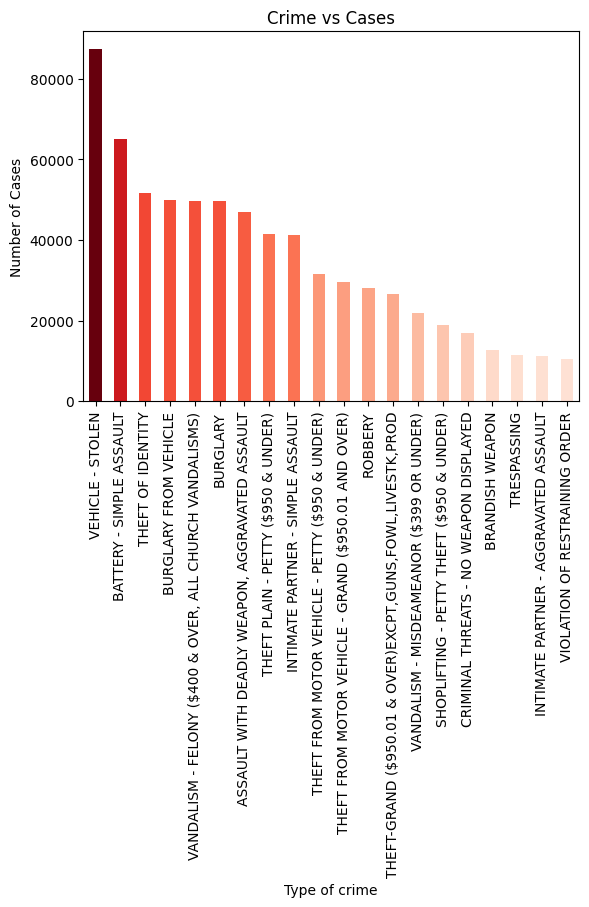

In [4]:
# plotting the number of cases for each type of crime

df['Crm Cd Desc'] = df['Crm Cd Desc'].str.upper() 

location_counts = df['Crm Cd Desc'].value_counts().sort_values(ascending=False).head(20)
top_ten_locations = location_counts.head(20)
colormap = plt.cm.get_cmap('Reds')
top_ten_locations.plot(kind='bar', color=colormap(top_ten_locations / top_ten_locations.max()), linewidth=3)

plt.xlabel('Type of crime')
plt.ylabel('Number of Cases')
plt.title('Crime vs Cases')
plt.xticks(rotation=90) 

plt.show()

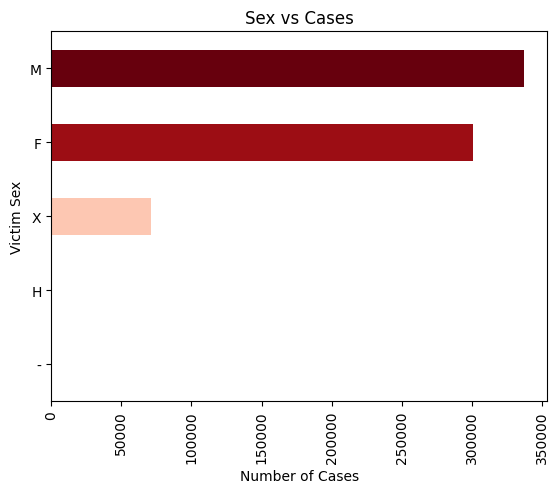

In [5]:
# plotting victim sex vs the number of cases

vict_sex= df['Vict Sex'].value_counts().sort_values(ascending=False).head(20)
vict_sex = vict_sex.head(20)
vict_sex = vict_sex.iloc[::-1]


vict_sex.plot(kind='barh', color=colormap(vict_sex / vict_sex.max()), linewidth=4)

plt.xlabel('Number of Cases')
plt.ylabel('Victim Sex')
plt.title('Sex vs Cases')
plt.xticks(rotation=90)

plt.show()

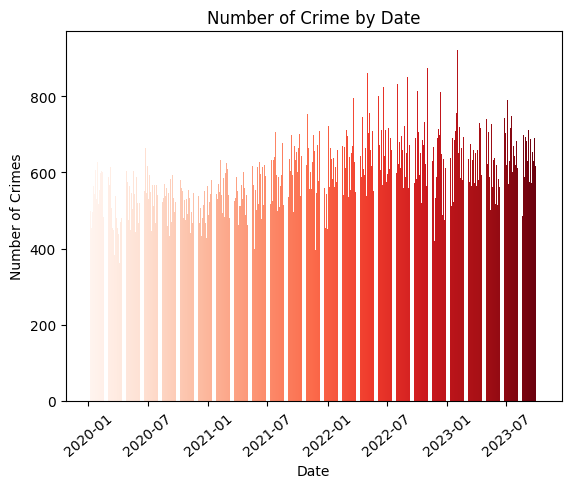

In [6]:
# plotting number of crimes by date

df['Date Rptd'] = pd.to_datetime(df['Date Rptd']) 
daily_counts = df['Date Rptd'].value_counts().sort_index()

colormap = plt.cm.get_cmap('Reds', len(daily_counts))
plt.bar(daily_counts.index, daily_counts.values, color=[colormap(i) for i in range(len(daily_counts))])
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.title('Number of Crime by Date')
plt.xticks(rotation=40)  


plt.show()

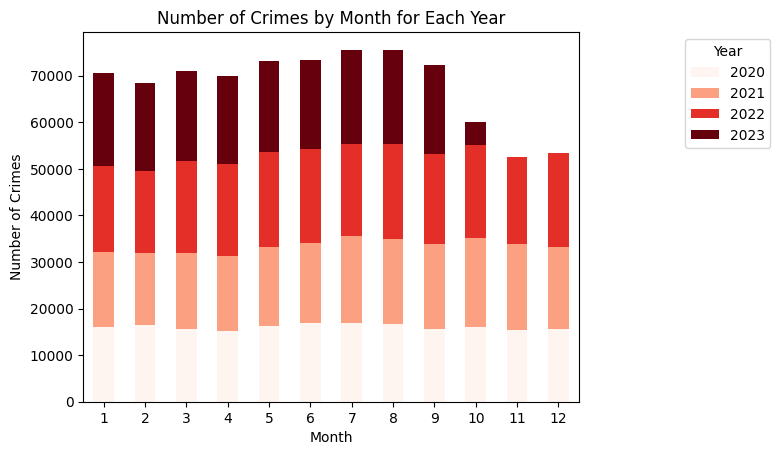

In [7]:
# plotting the number of crimes per month for every year from 2020 to 2023

df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
df['Month'] = df['Date Rptd'].dt.month
df['Year'] = df['Date Rptd'].dt.year

monthly_counts = df.groupby(['Year', 'Month']).size().reset_index(name='Count')
pivot_table = monthly_counts.pivot(index='Month', columns='Year', values='Count')
pivot_table.plot(kind='bar', stacked=True, colormap='Reds')

plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes by Month for Each Year')
plt.xticks(rotation=0)  
plt.legend(title='Year', bbox_to_anchor=(1.2, 1), loc='upper left')
plt.show()


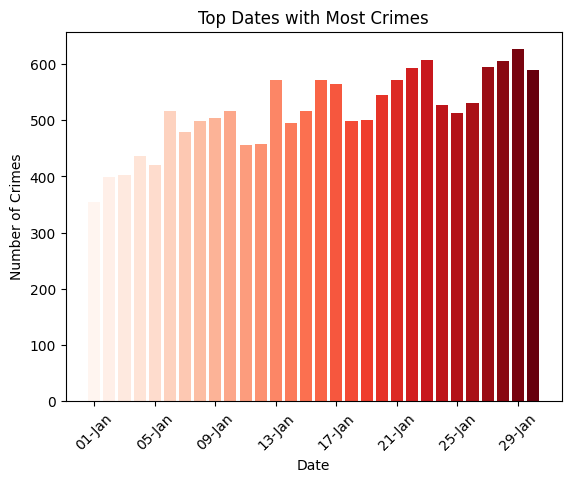

In [8]:
# plotting the dates with most crime occurances

df['Date Rptd'] = pd.to_datetime(df['Date Rptd']) 

daily_counts = df['Date Rptd'].value_counts().sort_values(ascending=False).sort_index()
top_ten_dates = daily_counts.head(30)
colormap = plt.cm.get_cmap('Reds', len(top_ten_dates))
plt.bar(top_ten_dates.index, top_ten_dates.values, color=[colormap(i) for i in range(len(top_ten_dates))], linewidth=3)

date_format = DateFormatter("%d-%b")

plt.gca().xaxis.set_major_formatter(date_format)
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.title('Top Dates with Most Crimes')
plt.xticks(rotation=45) 

plt.show()

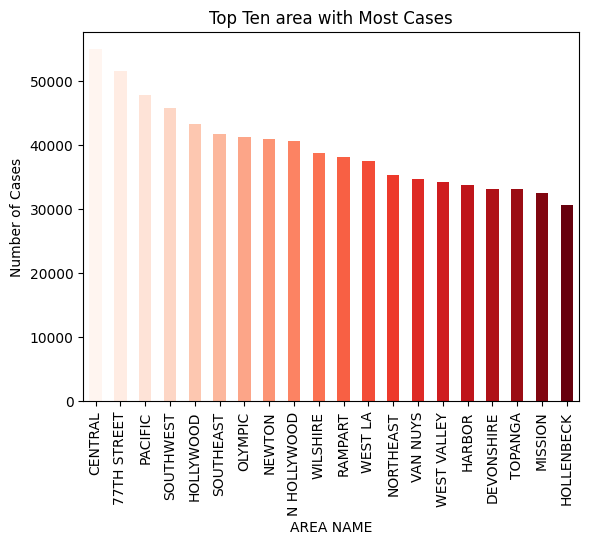

In [9]:
# plotting the top 10 areas with most cases


df['AREA NAME'] = df['AREA NAME'].str.upper() 
location_counts = df['AREA NAME'].value_counts().sort_values(ascending=False).head(20)
top_ten_locations = location_counts.head(20)
colormap = plt.cm.get_cmap('Reds', len(top_ten_locations))
top_ten_locations.plot(kind='bar', color=[colormap(i) for i in range(len(top_ten_locations))], linewidth=3)

plt.xlabel('AREA NAME')
plt.ylabel('Number of Cases')
plt.title('Top Ten area with Most Cases')
plt.xticks(rotation=90) 

plt.show()

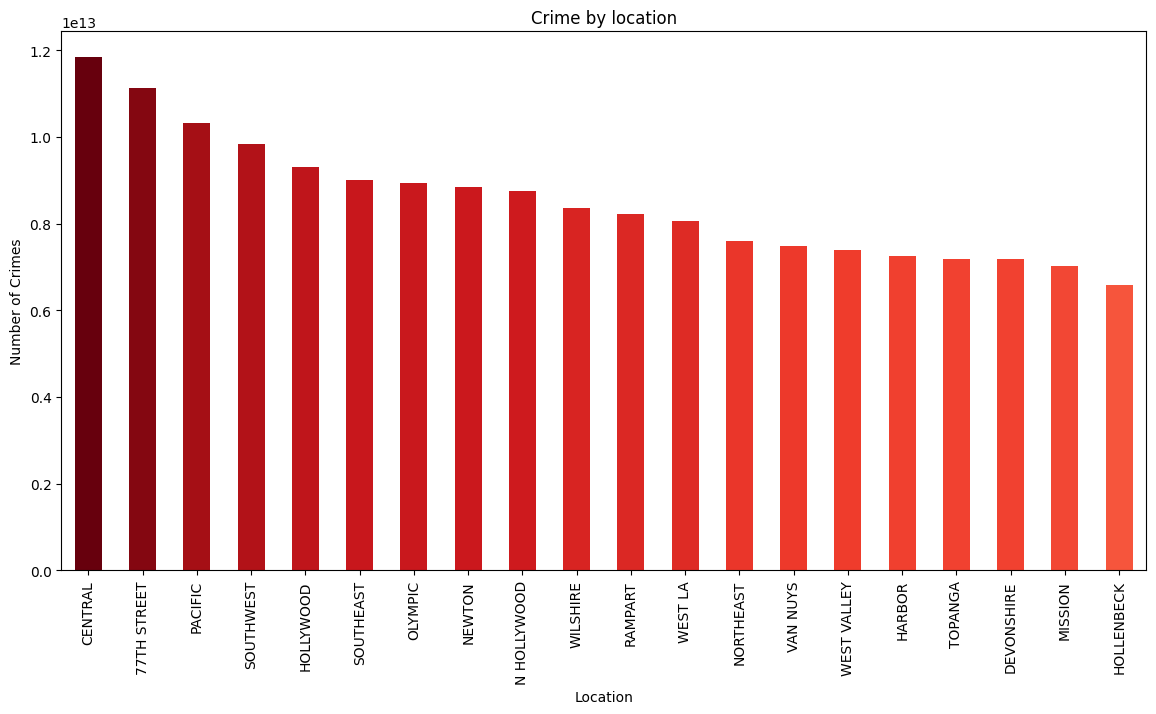

In [10]:
# plotting the number of crimes for each location

df['AREA NAME'] = df['AREA NAME'].str.upper()
mean_fine_by_desc = df.groupby('AREA NAME')['DR_NO'].sum().sort_values(ascending=False).head(20)
colormap = plt.cm.get_cmap('Reds')
mean_fine_by_desc.plot(kind='bar', color=colormap(mean_fine_by_desc / mean_fine_by_desc.max()), figsize=(14, 7))  

plt.xlabel('Location')
plt.ylabel('Number of Crimes')
plt.title('Crime by location')
plt.xticks(rotation=90) 

plt.show()

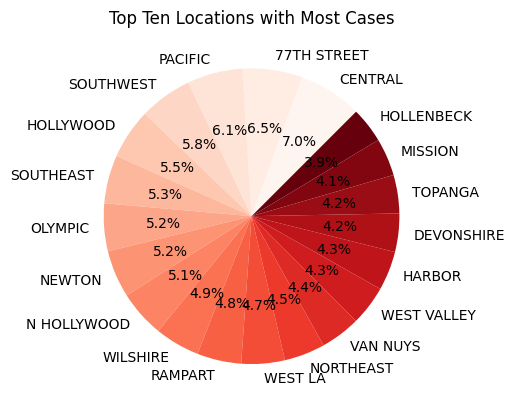

In [11]:
# plotting the top 10 locations with the most cases

df['AREA NAME'] = df['AREA NAME'].str.upper() 
location_counts = df['AREA NAME'].value_counts().sort_values(ascending=False)
top_ten_locations = location_counts.head(20)
colormap = plt.cm.get_cmap('Reds', len(top_ten_locations))

plt.pie(top_ten_locations, labels=top_ten_locations.index, autopct='%1.1f%%', startangle=45, colors=[colormap(i) for i in range(len(top_ten_locations))])
plt.title('Top Ten Locations with Most Cases')
plt.show()

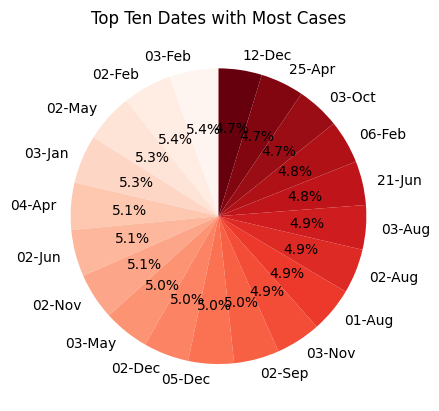

In [12]:
# plotting top 10 dates with the most cases 

df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
daily_counts = df['Date Rptd'].value_counts().sort_values(ascending=False)
top_ten_dates = daily_counts.nlargest(20)
day_month_labels = top_ten_dates.index.strftime('%d-%b')

plt.pie(top_ten_dates, labels=day_month_labels, autopct='%1.1f%%', startangle=90, colors=[colormap(i) for i in range(len(top_ten_locations))])
plt.title('Top Ten Dates with Most Cases')
plt.show()

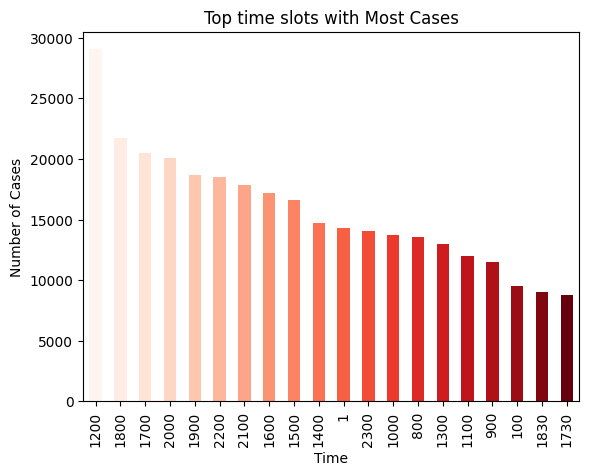

In [13]:
# plotting the time slots with most number of cases

time_counts = df['TIME OCC'].value_counts().sort_values(ascending=False).head(20)
top_ten_time = time_counts.head(20)
colormap = plt.cm.get_cmap('Reds', len(top_ten_time))
top_ten_time.plot(kind='bar', color=[colormap(i) for i in range(len(top_ten_time))], linewidth=3)

plt.xlabel('Time')
plt.ylabel('Number of Cases')
plt.title('Top time slots with Most Cases')
plt.xticks(rotation=90) 

plt.show()

## Probabilistic Methods

In [14]:
# finding the average

df['Year'] = df['Date Rptd'].dt.year
cases = df.groupby('Year').size()
E_c = cases.mean()
print(f"Average number of cases per year = {E_c}")

Average number of cases per year = 203970.5


In [15]:
# calculating mean of cases for each year

df['Year'] = df['Date Rptd'].dt.year
df['month'] = df['Date Rptd'].dt.month
cases = df.groupby(['Year', 'month']).size()
E_c = cases.mean()

In [16]:
df['Year'] = df['Date Rptd'].dt.year
cases = df.groupby('Year').size()
cases_new = cases.to_dict()
E_c = cases.mean()

l = list(cases_new.values())
k = list(cases_new.keys())
c = []

for i in l:
    c.append(i//12)

### Markov's Inequality
To find the probability that a particular year has more than x cases \

### $P(X \ge a) \le E(X) / a$

a is the threshold number of cases \
X is the random variable for cases \
E(x) is the expectation of X

In [17]:
# calculating the probability that the number of cases is greater than 21000 for the year 2021

X = 21000
y = 2021

t = k.index(y)
E = c[t]
P = E / X

print(f"P(X>={X}) <= {P}")

P(X>=21000) <= 0.8264761904761905


In [18]:
# calculating the probability that the number of cases is greater than 600000 for the year 2021

df['Year'] = df['Date Rptd'].dt.year
df['month'] = df['Date Rptd'].dt.month
cases = df.groupby(['Year','month']).size()
cv = cases.to_dict()
r = list(cv.values())
s = sum(r)
s1 = s // 3

X = 600000
y = 2021
E = s1
P = E / X

print(f"P(X>={X}) <= {P}")

P(X>=600000) <= 0.45326666666666665


In [19]:
# calculating variance for each month in each year

df['Year'] = df['Date Rptd'].dt.year
df['Month'] = df['Date Rptd'].dt.month
cases_per_month_year = df.groupby(['Year', 'Month']).size()

variance = cases_per_month_year.groupby('Year').var()
variance = variance.to_dict()

l1 = list(variance.values())
k1 = list(variance.keys())

### Chebyshev's Inequality
To find the probability that a particular year has more than x cases

### $P(|X - E(x)| \ge a) \le V / a^{2}$ 

a is the threshold number of cases \
X is the random variable for cases \
E(x) is the expectation of X
V is the variance of X

In [20]:
# calculating the probability that the number of cases is greater than 21000 for the year 2021

X = 21000 - E
y = 2021
t = k1.index(y)
V = l1[t]
P = (V / X**2)

print(f"P(|X - {E})| >= 21000) <= {P}")

P(|X - 271960)| >= 21000) <= 2.3229618961404e-05


In [21]:
# calculating the probability that the number of cases is greater than 300000 for the year 2021

X = 300000 - s1
y = 2021
V = np.var(l)

P = (V / X**2)

print(f"P(|X - {E})| >= 300000) <= {P}")

P(|X - 271960)| >= 300000) <= 0.5391056085686639


### Bayesian Conditional Probability

##### $ P(C>X | month=m) = P(month=m | C>X) * P(C>X) / P(month=m) $

In [22]:
# calculating bayesian conditional probability

dic = {'JAN':1, 'FEB':2, 'MAR':3, 'APR':4, 'MAY':5, 'JUN':6, 'JUL':7, 'AUG':8, 'SEP':9, 'OCT':10, 'NOV':11, 'DEC':12}
X = 18000
month = 'JAN'

df['Year'] = df['Date Rptd'].dt.year
df['month'] = df['Date Rptd'].dt.month
cases = df.groupby(['Year', 'month']).size()

E_c = cases.mean()

m = cases.to_dict()
d = list(m.values())
count=0
for i in d:
    if(i > X):
        count+=1
v = dic[month]

g = 0
for k, value in m.items():
    if(k[1] == 6):
        if value > X:
            g+=1
  
P1 = g / count
P2 = count / 48
P3 = 1 / 12

P = P1 * P2 / P3
print(f"The probability that the number of cases greater than {X} given that the month is {month} = {P}")

The probability that the number of cases greater than 18000 given that the month is JAN = 0.5000000000000001


## Correlation Analysis

In [ ]:
# finding the Crime Description for each Crime Code 

crm_lookup = defaultdict()
for index, row in df.iterrows():
    if row['Crm Cd'] not in crm_lookup.keys():
        crm_lookup[row['Crm Cd']] = row['Crm Cd Desc']

In [23]:
# crm_lookup result of previous cell hardcoded here

crm_lookup = {
    624: 'BATTERY - SIMPLE ASSAULT', 845: 'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE', 745: 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
    740: 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)', 121: 'RAPE, FORCIBLE', 442: 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
    946: 'OTHER MISCELLANEOUS CRIME', 341: 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD', 330: 'BURGLARY FROM VEHICLE',
    930: 'CRIMINAL THREATS - NO WEAPON DISPLAYED', 648: 'ARSON', 626: 'INTIMATE PARTNER - SIMPLE ASSAULT', 440: 'THEFT PLAIN - PETTY ($950 & UNDER)',
    354: 'THEFT OF IDENTITY', 210: 'ROBBERY', 230: 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT', 310: 'BURGLARY', 510: 'VEHICLE - STOLEN',
    420: 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)', 761: 'BRANDISH WEAPON', 236: 'INTIMATE PARTNER - AGGRAVATED ASSAULT', 662: 'BUNCO, GRAND THEFT',
    350: 'THEFT, PERSON', 860: 'BATTERY WITH SEXUAL CONTACT', 480: 'BIKE - STOLEN', 623: 'BATTERY POLICE (SIMPLE)', 956: 'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD',
    900: 'VIOLATION OF COURT ORDER', 888: 'TRESPASSING', 331: 'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)', 901: 'VIOLATION OF RESTRAINING ORDER',
    886: 'DISTURBING THE PEACE', 421: 'THEFT FROM MOTOR VEHICLE - ATTEMPT', 647: 'THROWING OBJECT AT MOVING VEHICLE', 940: 'EXTORTION',
    810: 'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ', 922: 'CHILD STEALING', 812: 'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)',
    220: 'ATTEMPTED ROBBERY', 625: 'OTHER ASSAULT', 755: 'BOMB SCARE', 649: 'DOCUMENT FORGERY / STOLEN FELONY', 815: 'SEXUAL PENETRATION W/FOREIGN OBJECT',
    251: 'SHOTS FIRED AT INHABITED DWELLING', 320: 'BURGLARY, ATTEMPTED', 890: 'FAILURE TO YIELD', 351: 'PURSE SNATCHING', 850: 'INDECENT EXPOSURE',
    820: 'ORAL COPULATION', 668: 'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)', 902: 'VIOLATION OF TEMPORARY RESTRAINING ORDER', 664: 'BUNCO, PETTY THEFT',
    920: 'KIDNAPPING - GRAND ATTEMPT', 343: 'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)', 437: 'RESISTING ARREST', 753: 'DISCHARGE FIREARMS/SHOTS FIRED', 
    928: 'THREATENING PHONE CALLS/LETTERS', 910: 'KIDNAPPING', 760: 'LEWD/LASCIVIOUS ACTS WITH CHILD', 762: 'LEWD CONDUCT', 661: 'UNAUTHORIZED COMPUTER ACCESS', 
    821: 'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH', 237: 'CHILD NEGLECT (SEE 300 W.I.C.)', 903: 'CONTEMPT OF COURT', 
    813: 'CHILD ANNOYING (17YRS & UNDER)', 666: 'BUNCO, ATTEMPT', 627: 'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT', 805: 'PIMPING', 763: 'STALKING', 
    441: 'THEFT PLAIN - ATTEMPT', 122: 'RAPE, ATTEMPTED', 443: 'SHOPLIFTING - ATTEMPT', 450: 'THEFT FROM PERSON - ATTEMPT', 520: 'VEHICLE - ATTEMPT STOLEN', 
    434: 'FALSE IMPRISONMENT', 410: 'BURGLARY FROM VEHICLE, ATTEMPTED', 352: 'PICKPOCKET', 670: 'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)', 
    951: 'DEFRAUDING INNKEEPER/THEFT OF SERVICES, $950 & UNDER', 660: 'COUNTERFEIT', 654: 'CREDIT CARDS, FRAUD USE ($950 & UNDER', 
    250: 'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT', 110: 'CRIMINAL HOMICIDE', 652: 'DOCUMENT WORTHLESS ($200 & UNDER)', 933: 'PROWLER', 
    950: 'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01', 231: 'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER', 345: 'DISHONEST EMPLOYEE - GRAND THEFT', 
    822: 'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS', 814: 'CHILD PORNOGRAPHY', 932: 'PEEPING TOM', 622: 'BATTERY ON A FIREFIGHTER', 
    471: 'TILL TAP - PETTY ($950 & UNDER)', 235: 'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT', 470: 'TILL TAP - GRAND THEFT ($950.01 & OVER)', 
    921: 'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE', 906: 'FIREARMS RESTRAINING ORDER (FIREARMS RO)', 433: 'DRIVING WITHOUT OWNER CONSENT (DWOC)', 
    651: 'DOCUMENT WORTHLESS ($200.01 & OVER)', 806: 'PANDERING', 943: 'CRUELTY TO ANIMALS', 653: 'CREDIT CARDS, FRAUD USE ($950.01 & OVER)',
    436: 'LYNCHING - ATTEMPTED', 949: 'ILLEGAL DUMPING', 446: 'PETTY THEFT - AUTO REPAIR', 113: 'MANSLAUGHTER, NEGLIGENT', 487: 'BOAT - STOLEN',
    438: 'RECKLESS DRIVING', 451: 'PURSE SNATCHING - ATTEMPT', 439: 'FALSE POLICE REPORT', 485: 'BIKE - ATTEMPTED STOLEN', 944: 'CONSPIRACY',
    954: 'CONTRIBUTING', 756: 'WEAPONS POSSESSION/BOMBING', 942: 'BRIBERY', 473: 'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)',
    347: 'GRAND THEFT / INSURANCE FRAUD', 435: 'LYNCHING', 880: 'DISRUPT SCHOOL', 444: 'DISHONEST EMPLOYEE - PETTY THEFT', 475: 'THEFT, COIN MACHINE - ATTEMPT',
    474: 'THEFT, COIN MACHINE - PETTY ($950 & UNDER)', 931: 'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)', 865: 'DRUGS, TO A MINOR',
    349: 'GRAND THEFT / AUTO REPAIR', 353: 'DRUNK ROLL', 452: 'PICKPOCKET, ATTEMPT', 870: 'CHILD ABANDONMENT',
    522: 'VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)', 924: 'TELEPHONE PROPERTY - DAMAGE',
    840: 'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM', 948: 'BIGAMY', 884: 'FAILURE TO DISPERSE', 
    904: 'FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)', 830: 'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)',
    432: 'BLOCKING DOOR INDUCTION CENTER', 882: 'INCITING A RIOT', 445: 'DISHONEST EMPLOYEE ATTEMPTED THEFT'
}

desc_lookup = {'X': 0, 'H': 1, 'B': 2, 'W': 3, 'O': 4, 'A': 5, 'K': 6, 'I': 7, 'C': 8, 'F': 9, 'V': 10, 'nan': 11, 'P': 12, 'U': 13, 'Z': 14, 'G': 15, 'J': 16,
               'S': 17, 'L': 18, 'D': 19, '-': 20}

In [24]:
l = df['Crm Cd'].value_counts()[:20].index.tolist()
df = df[~df['Crm Cd'].isin(l)]

In [25]:
X = df[['TIME OCC', 'AREA', 'Vict Age', 'Vict Sex', 'Vict Descent']]
y = df['Crm Cd'].to_frame()

In [26]:
# manually encoding the values of certain features

X.loc[:, 'Vict Sex'] = X['Vict Sex'].replace('M', 0)
X.loc[:, 'Vict Sex'] = X['Vict Sex'].replace('F', 1)
X.loc[:, 'Vict Sex'] = X['Vict Sex'].replace('H', 2)
X.loc[:, 'Vict Sex'] = X['Vict Sex'].replace('X', 3)
X.loc[:, 'Vict Sex'] = X['Vict Sex'].fillna(2)
X.loc[:, 'Vict Descent'] = X['Vict Descent'].fillna('X')
X.loc[:, 'Vict Descent'] = X['Vict Descent'].replace('H', desc_lookup['H'])

for k, v in desc_lookup.items():
    X.loc[:, 'Vict Descent'] = X['Vict Descent'].replace(k, v)

In [27]:
temp_df = X.copy()
temp_df['Crm Cd'] = df['Crm Cd']
temp_df.head()

,TIME OCC,AREA,Vict Age,Vict Sex,Vict Descent,Crm Cd
2,1200,1,0,3.0,0,845
5,30,1,25,1.0,1,121
7,40,1,0,3.0,0,946
13,1638,1,0,3.0,0,648
29,400,1,19,1.0,2,121


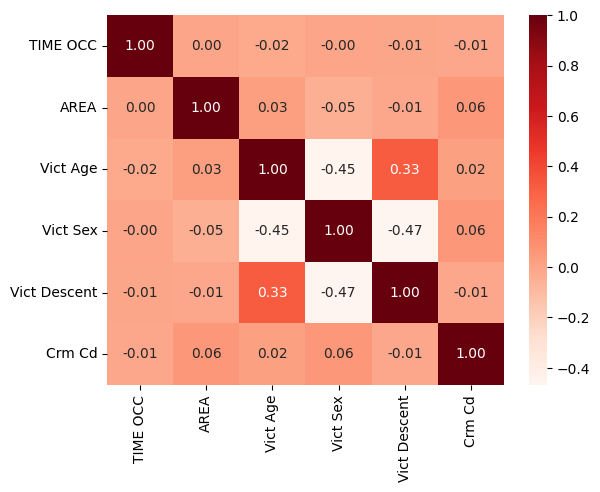

In [28]:
# plotting correlation matrix as a heatmap

correlation_matrix = temp_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt=".2f")
plt.show()